# [Pix2Text V1.0](https://github.com/breezedeus/Pix2Text): a Free Alternative to Mathpix

Author: [Breezedeus](https://breezedeus.com)


## Documents

- [Pix2Text V1.0 New Release: The Best Open-Source Formula Recognition Model](https://www.breezedeus.com/article/p2t-v1.0)
- Pix2Text (P2T) Github: [breezedeus/pix2text](https://github.com/breezedeus/Pix2Text) ;
- Pix2Text Online Free Service: [p2t.breezedeus.com](https://p2t.breezedeus.com/) ;
- Pix2Text HuggingFace Space: [Online Demo](https://huggingface.co/spaces/breezedeus/Pix2Text-Demo) ;
- Pix2Text More: [breezedeus.com/pix2text](https://breezedeus.com/pix2text) ;
- Pix2Text Discard: https://discord.gg/drT8H85Y

In [1]:
!pip install -U setuptools pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.5/821.5 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 42.2 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [ ]:
!pip install cupy-cuda12x

## Method 1: Using the model Directly
This method doesn't need to install pix2text, but can only recognize pure formula images.

In [1]:
! pip install transformers>=4.37.0 pillow optimum[onnxruntime]

In [ ]:
#! pip install transformers>=4.37.0 pillow optimum[onnxruntime]
import requests
from io import BytesIO

from PIL import Image
from transformers import TrOCRProcessor
from optimum.onnxruntime import ORTModelForVision2Seq

processor = TrOCRProcessor.from_pretrained('breezedeus/pix2text-mfr')
model = ORTModelForVision2Seq.from_pretrained('breezedeus/pix2text-mfr', use_cache=False)

def download_img(url):
    response = requests.get(url)
    image_file = BytesIO(response.content)
    return Image.open(image_file).convert('RGB')


image_fps = [
    'https://raw.githubusercontent.com/breezedeus/Pix2Text/main/docs/examples/formula.jpg',
    'https://raw.githubusercontent.com/breezedeus/Pix2Text/main/docs/examples/math-formula-42.png',
]
images = [download_img(fp) for fp in image_fps]
pixel_values = processor(images=images, return_tensors="pt").pixel_values
# print(f'pixel_values', pixel_values)
generated_ids = model.generate(pixel_values)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)
print(f'generated_ids: {generated_ids}, \ngenerated text: {generated_text}')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/450 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/39.2k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

encoder_model.onnx:   0%|          | 0.00/87.5M [00:00<?, ?B/s]

decoder_model.onnx:   0%|          | 0.00/30.1M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/210 [00:00<?, ?B/s]

generated_ids: tensor([[  2,  95, 263, 353, 380, 261, 264, 262, 263, 346, 262, 313, 338, 313,
         323, 281, 296, 307, 261, 261, 270, 263, 357, 264, 262, 293, 270, 268,
         261, 265, 262, 359, 261, 263, 357, 264, 262, 372, 270, 268, 261, 265,
         262, 429, 261, 262, 263, 353, 386, 261, 264, 262, 372, 261, 265, 262,
         263, 346, 262, 267, 313, 338, 313, 323, 281, 296, 307, 266, 261, 261,
         263, 303,  12, 263, 303, 596, 263, 415, 262, 379, 261, 264, 262, 293,
         271, 372, 261, 272, 282, 264, 262, 293, 271, 372, 261, 263, 304, 596,
         265, 262, 269, 261, 263, 304,  13,   2],
        [  2,  64, 705, 264, 262, 282, 263, 512, 263, 277, 262, 268, 261, 262,
         333, 261, 261, 263, 277, 262, 268, 272, 333, 265, 262, 282, 272, 263,
         277, 262, 268, 261, 262, 333, 261, 261, 261, 262, 268, 272, 333, 282,
         261,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

## Method 2: Using Pix2Text

This method requires the installation of pix2text, utilizing the Mathematical Formula Detection model (MFD) within Pix2Text. It is capable of recognizing not only pure formula images but also mixed images containing text.



In [3]:
!pip install pix2text>=1.0.2

### Recognize Images with English/Simplfied Chinese Texts

100%|██████████| 11302/11302 [00:00<00:00, 14833.61KB/s]
2171KB [00:00, 5278.92KB/s]                          
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(



preprocessor_config.json:   0%|          | 0.00/450 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/39.2k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

encoder_model.onnx:   0%|          | 0.00/87.5M [00:00<?, ?B/s]

decoder_model.onnx:   0%|          | 0.00/30.1M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/210 [00:00<?, ?B/s]

100%|██████████| 2/2 [00:14<00:00,  7.43s/it]


outs for pure formula images ['{\\cal L}_{\\mathrm{e y e l i d \\,}}=\\sum_{t=1}^{T} \\sum_{v=1}^{V} {\\cal M}_{v}^{\\mathrm{( e y e l i d \\, )}} \\left( \\left\\| \\hat{h}_{t, v}-x_{t, v} \\right\\|^{2} \\right)', '\\lim_{x arrow \\frac{1} {4}} \\frac{1-4^{x-\\frac{1} {4}}} {1-4 x}']


  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]

100%|██████████| 5/5 [00:13<00:00,  2.69s/it]


gradients in at least two (significantly) different orientations are the easiest to localize, as shown schematically in Figure 7.4a.
These intuitions can be formalized by looking at the simplest possible matching criterion for comparing two image patches, i.e., their (weighted) summed square difference,
$$
E_{\mathrm{W S S D}} ( {\bf u} )=\sum_{i} w ( {\bf x}_{i} ) [ I_{1} ( {\bf x}_{i}+{\bf u} )-I_{0} ( {\bf x}_{i} ) ]^{2}, \tag{7.1}
$$
where $I_{0}$ and $I_{1}$ are the two images being compared, ${\mathbf u}=( u, v )$ is the displacement vector, $w ( {\bf x} )$ is a spatially varying weighting (or window) function, and the summation i is over all the pixels in the patch. Note that this is the same formulation we later use to estimate motion between complete images (Section 9.1).
When performing feature detection, we do not know which other image locations the feature will end up being matched against. Therefore, we can only compute how stable this


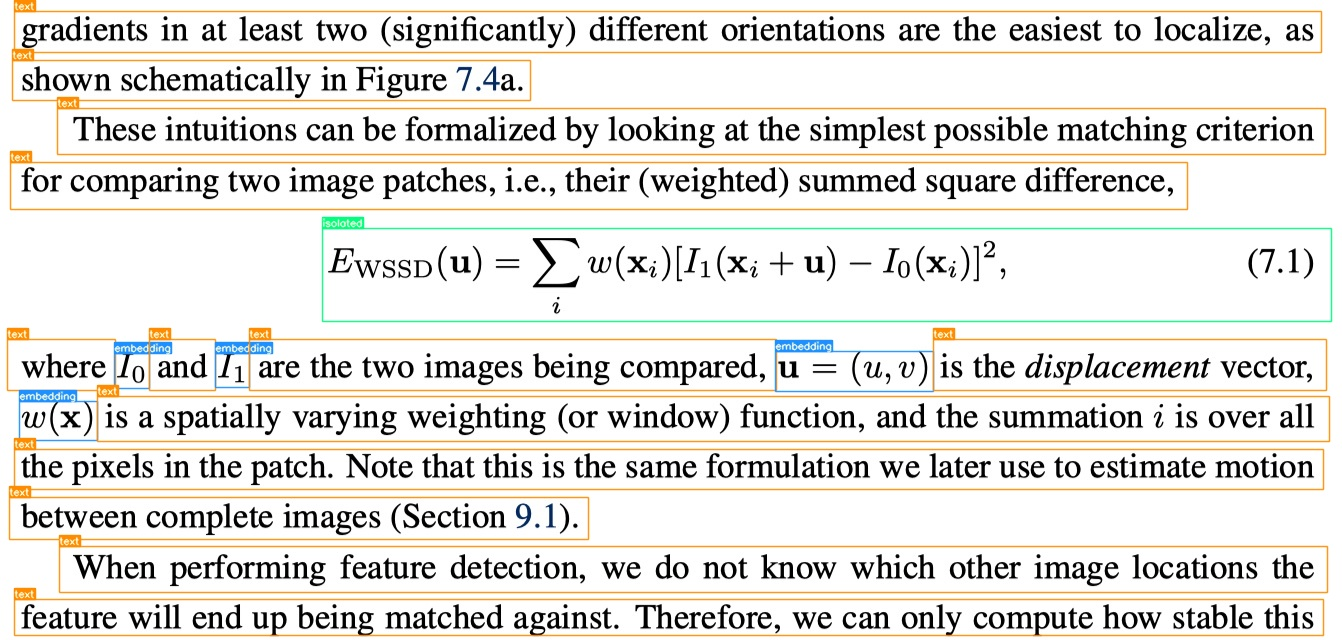

In [7]:
#! pip install pix2text>=1.0
import requests
from io import BytesIO
from PIL import Image

from pix2text import Pix2Text, merge_line_texts

def download_img(url):
    response = requests.get(url)
    image_file = BytesIO(response.content)
    return Image.open(image_file).convert('RGB')

image_fps = [
    'https://raw.githubusercontent.com/breezedeus/Pix2Text/main/docs/examples/formula.jpg',
    'https://raw.githubusercontent.com/breezedeus/Pix2Text/main/docs/examples/math-formula-42.png',
]
images = [download_img(img_fp) for img_fp in image_fps]

p2t = Pix2Text()
outs = p2t.recognize_formula(images, return_text=True)  # recognize pure formula images
print('outs for pure formula images', outs)

mixed_img_fp = 'https://raw.githubusercontent.com/breezedeus/Pix2Text/main/docs/examples/en1.jpg'
mixed_img = download_img(mixed_img_fp)

outs2 = p2t.recognize(mixed_img, return_text=True, save_analysis_res='en1-out.jpg')  # recognize mixed images
print(outs2)
from IPython.display import display
display(Image.open('en1-out.jpg'))

### Recognize Images with Other-language Texts

In [9]:
! pip install pix2text[multilingual]>=1.0.2

100%|██████████| 3/3 [00:11<00:00,  3.83s/it]


RÚT GỌN BIỂU THỨC ĐẠI SỐ
VÀ CÁC BÀI TOÁN LIÊN QUAN
ALÝ IHUYÉT
1 Kiến thức 6, Z,8 quan trong cần nhớ
a. Tính chất về phân số ( phân thức): $\frac{A. M} {B. M}=\frac{A} {B}$  $( M \neq0, B \neq0 )$ 
b. Những hằng đẳng thức đáng nhớ
$$
\begin{array} {r l} {\bullet} & {{} ( A+B )^{2}=A^{2}+2 A B+B^{2}} \\ {\bullet} & {{} ( A-B )^{2}=A^{2} \cdot2 A B+B^{2}} \end{array}
$$



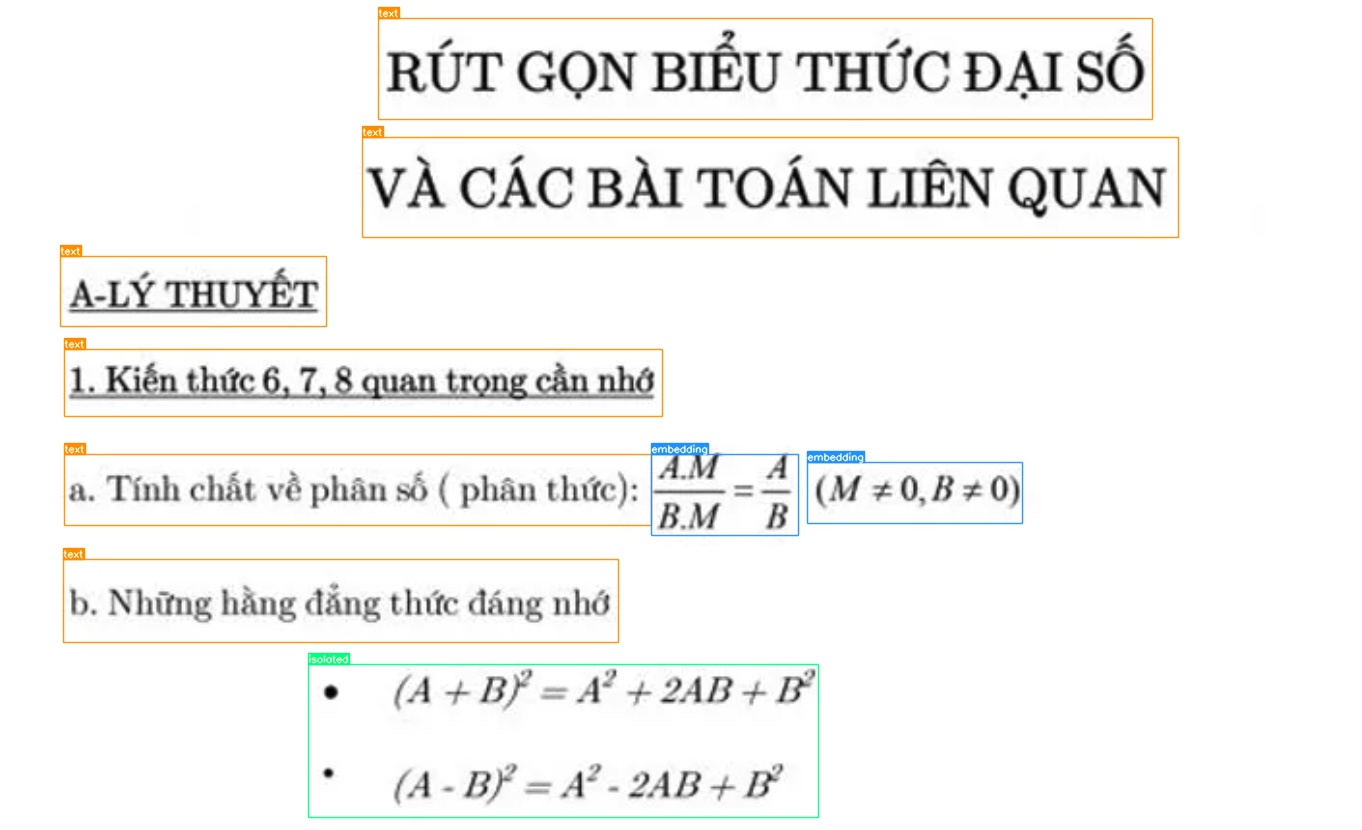

In [12]:
#! pip install pix2text[multilingual]>=1.0
import requests
from io import BytesIO
from PIL import Image

from pix2text import Pix2Text, merge_line_texts

def download_img(url):
    response = requests.get(url)
    image_file = BytesIO(response.content)
    return Image.open(image_file).convert('RGB')

p2t = Pix2Text(languages=('en', 'vi'))  # supported language list: https://github.com/breezedeus/Pix2Text?tab=readme-ov-file#list-of-supported-languages

mixed_img_fp = 'https://raw.githubusercontent.com/breezedeus/Pix2Text/main/docs/examples/vietnamese.jpg'
mixed_img = download_img(mixed_img_fp)

outs2 = p2t.recognize(mixed_img, return_text=True, auto_line_break=False, save_analysis_res='vietnamese-out.jpg')  # recognize mixed images
print(outs2)
from IPython.display import display
display(Image.open('vietnamese-out.jpg'))